Logistic Regression
Using 1416 samples (20.0%): Validation Accuracy = 0.9407
Using 2832 samples (40.0%): Validation Accuracy = 0.9611
Using 4248 samples (60.0%): Validation Accuracy = 0.9755
Using 5664 samples (80.0%): Validation Accuracy = 0.9857
Using 7080 samples (100.0%): Validation Accuracy = 0.9836
Random Forest
Using 1416 samples (20.0%): Validation Accuracy = 0.9571
Using 2832 samples (40.0%): Validation Accuracy = 0.9775
Using 4248 samples (60.0%): Validation Accuracy = 0.9775
Using 5664 samples (80.0%): Validation Accuracy = 0.9857
Using 7080 samples (100.0%): Validation Accuracy = 0.9877
SVM
Using 1416 samples (20.0%): Validation Accuracy = 0.9468
Using 2832 samples (40.0%): Validation Accuracy = 0.9448
Using 4248 samples (60.0%): Validation Accuracy = 0.9468
Using 5664 samples (80.0%): Validation Accuracy = 0.9652
Using 7080 samples (100.0%): Validation Accuracy = 0.9734


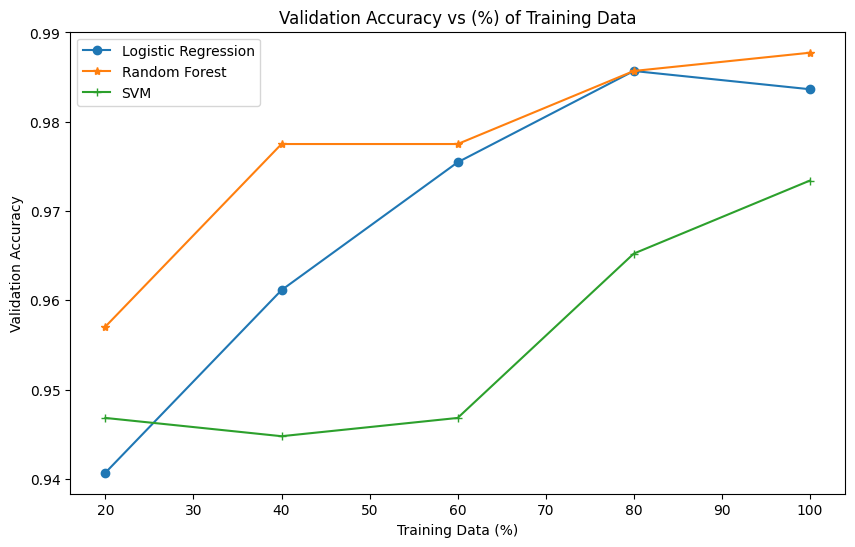

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from random import sample

deep_f = np.load("datasets/train/train_feature.npz")
X_d = deep_f['features']
y_d = deep_f['label']
X_d_flat = X_d.reshape(X_d.shape[0], -1)

val_f = np.load("datasets/valid/valid_feature.npz")
X_val = val_f['features']
y_val = val_f['label']
X_val_flat = X_val.reshape(X_val.shape[0], -1)

X_d_flat, y_d = shuffle(X_d_flat, y_d, random_state=42)

def model_training(X_train, y_train, X_valid, y_valid, model, per):
    val_acc = []
    
    for p in per:
        subset_size = int(p * len(X_train))
        indices = sample(range(len(X_train)), subset_size)  # Randomly select indices
        X_subset = X_train[indices]
        y_subset = y_train[indices]
        
        model.fit(X_subset, y_subset)
        y_pred = model.predict(X_valid)
        acc = accuracy_score(y_valid, y_pred)
        val_acc.append(acc)
        
        print(f"Using {subset_size} samples ({p*100}%): Validation Accuracy = {acc:.4f}")
    
    return val_acc

model_lr = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier(n_estimators=200)
model_svc = SVC()

per = [0.2, 0.4, 0.6, 0.8, 1.0]

print("Logistic Regression")
lr_accuracies = model_training(X_d_flat, y_d, X_val_flat, y_val, model_lr, per)

print("Random Forest")
rf_accuracies = model_training(X_d_flat, y_d, X_val_flat, y_val, model_rf, per)

print("SVM")
svc_accuracies = model_training(X_d_flat, y_d, X_val_flat, y_val, model_svc, per)

plt.figure(figsize=(10, 6))
plt.plot([p * 100 for p in per], lr_accuracies, marker='o', label='Logistic Regression')
plt.plot([p * 100 for p in per], rf_accuracies, marker='*', label='Random Forest')
plt.plot([p * 100 for p in per], svc_accuracies, marker='+', label='SVM')

plt.xlabel("Training Data (%)")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs (%) of Training Data")
plt.legend()
plt.show()


In [2]:
t_d = np.load("datasets/test/test_feature.npz", allow_pickle=True)
t_X = t_d['features'] 
X_t_scaled = t_X.reshape(t_X.shape[0], -1)
best_model = None
best_acc = 0
op_per = 0

for i, p in enumerate(per):
    if lr_accuracies[i] > best_acc:
        best_acc = lr_accuracies[i]
        best_model = model_lr
        op_per = p
    if rf_accuracies[i] > best_acc:
        best_acc = rf_accuracies[i]
        best_model = model_rf
        op_per = p
    if svc_accuracies[i] > best_acc:
        best_acc = svc_accuracies[i]
        best_model = model_svc
        op_per = p
        
print(f"\nOptimal model : {best_model.__class__.__name__} with accuracy {best_acc:.4f} using {op_per*100:.0f}% .")

sub_size = int(op_per * len(X_d_flat))
X_s= X_d_flat[:sub_size]
y_s = y_d[:sub_size]
best_model.fit(X_s, y_s)

test_pred = best_model.predict(X_t_scaled)
print("\nPredicted values :")
print(test_pred)


Optimal model : RandomForestClassifier with accuracy 0.9877 using 100% .

Predicted values :
[1 0 0 ... 0 1 1]
